# Predicting LendingClub Loan Status

by Iñigo Martiarena Conde and Carlos Rodríguez-Viña Martínez

### Introduction

LendingClub is a US peer-to-peer lending company and the world's largest peer-to-peer lending platform.

Lending Club enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.



### Goal 

The goal of this project is to build a machine learning model to predict the probability that a loan will charge off. We will attempt to only use data available to investors via the LendingClub loan listing, including information about the borrower (income, employment length, FICO score, debt-to-income ratio, etc.) and the loan listing (the loan amount, loan purpose, loan grade, interest rate, installment, etc.). Such a predictive model could help LendingClub investors make better-informed investment decisions. We will only consider loans that LendingClub accepted under its credit underwriting policy.

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import pandas_profiling
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import scipy as sp

### Import Data

In [2]:
data1 = pd.read_csv('../data/Loan_training_set_1_4.csv', skiprows = 1, skipfooter = 4, engine = 'python')
data2 = pd.read_csv('../data/Loan_training_set_2_4.csv', skiprows = 1, skipfooter = 2, engine = 'python')
data3 = pd.read_csv('../data/Loan_training_set_3_4.csv', skiprows = 1, skipfooter = 2, engine = 'python')
data4 = pd.read_csv('../data/Loan_training_set_4_4.csv', skiprows = 1, skipfooter = 2, engine = 'python')

In [3]:
data = pd.concat([data1, data2, data3, data4])

### Data Treatment

We examine the LendingClub website and Data Dictionary to determine which features would have been available at the time of the loan. Here's the list of features we currently have, in alphabetical order:

In [4]:
print(sorted(data.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'debt_settlement_flag_date', 'deferral_term', 'delinq_2yrs', 'delinq_amnt', 'desc', 'disbursement_method', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', '

### Missing Values

We want to know exactly how much __null values__ we have?

In [5]:
def null_values(data):
        mis_val = data.isnull().sum()
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("El dataframe tiene " + str(data.shape[1]) + " columnas.\n"      
            "Hay " + str(mis_val_table_ren_columns.shape[0]) +
              " columnas que tienen valores NA.")
        return mis_val_table_ren_columns

In [6]:
miss_values = null_values(data)
miss_values.head(60)

El dataframe tiene 151 columnas.
Hay 74 columnas que tienen valores NA.


,Missing Values,% of Total Values
member_id,884876,100.0
orig_projected_additional_accrued_interest,882607,99.7
hardship_dpd,882215,99.7
hardship_reason,882215,99.7
hardship_status,882215,99.7
deferral_term,882215,99.7
hardship_amount,882215,99.7
hardship_start_date,882215,99.7
hardship_end_date,882215,99.7
payment_plan_start_date,882215,99.7


After a close inspecction of the __null values__, we have decided not to eliminate by __% null values__, because during our first approach we have identified significant variables with __null values__ that would have been eliminated if we had proceed that way.

So instead, For each of these features, we check the description in the Data Dictionary and only keep the features that would have been available to us considering the time of the loan. These include features in the loan application, and any features added by LendingClub when the loan listing was accepted, such as the loan grade and interest rate.

I'm using my best available knowledge to determine which loan features are known to potential investors. I am not an investor on LendingClub, so my knowledge of the LendingClub investment process is not exact.

In [7]:
keep = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'pub_rec', 'revol_bal', 'total_acc',
       'last_pymnt_amnt', 'fico_range_low', 'tot_coll_amt',
       'tot_cur_bal', 'acc_open_past_24mths', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mort_acc', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_il_tl', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'total_bc_limit',
       'total_il_high_credit_limit', 'loan_status', 'int_rate_range', 'grade',
       'verification_status',
       'home_ownership', 'debt_settlement_flag',
       'initial_list_status','emp_length']

In [8]:
len(keep)

38

In [9]:
drop_list = [col for col in data.columns if col not in keep]
print(drop_list)

['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'sub_grade', 'emp_title', 'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy',

Drop these variables that we have consider not relevant to our study.

In [10]:
data.drop(labels=drop_list, axis=1, inplace=True)

In [11]:
data.shape

(884876, 37)

In [12]:
data.columns

Index(['loan_amnt', 'installment', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'tot_coll_amt', 'tot_cur_bal', 'acc_open_past_24mths', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mort_acc', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_il_tl', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'total_bc_limit',
       'total_il_high_credit_limit', 'debt_settlement_flag'],
      dtype='object')

### Exploratory Analysis

We'll inspect each feature individually, and do the following:

 - Define Target Variable
 - Drop the feature if it is not useful for predicting the loan status.
 - View summary statistics and visualize the data, plotting against the loan status.
 - Modify the feature to make it useful for modeling, if necessary.
 
We define a function for plotting a variable and comparing with the loan status:

In [13]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = data.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

### Target Variable

Our objective is to create a model that predicts fully paid loans or charged off loans based on historic data assembled by Lending Club.

Loan status is the categorical variable that indicates the status of the loan, which has 7 different values:

- __Fully Paid__: Fully paid loan
- __Charged off__: Loan that the bank is not going to recover.
- __Current__: Loan whith all the schedule payments
- __Late (31-120 days)__: Loan with 31-120 days delay
- __In Grace Period__: Loan past due but with 15 days of grace period
- __Late (16 -30 days)__: Loan with 16-30 days delay    
- __Default__: Loan with more than 120 days delay.

"In Grace in Period" and "Current" are values that as to day are still being process, so we dont know the final outcome, so for the purpose of our work they are going to be eliminated.


As our target is to know when to give a loan or not, we are going to consider "Default","Late (16-30 days)" and "Late (31-120 days") as "Charged Off", eventhough there is still a chance to be paid, as a bank it is not necessary for me to find my self in this predictment.


#### Distribution Loan Status

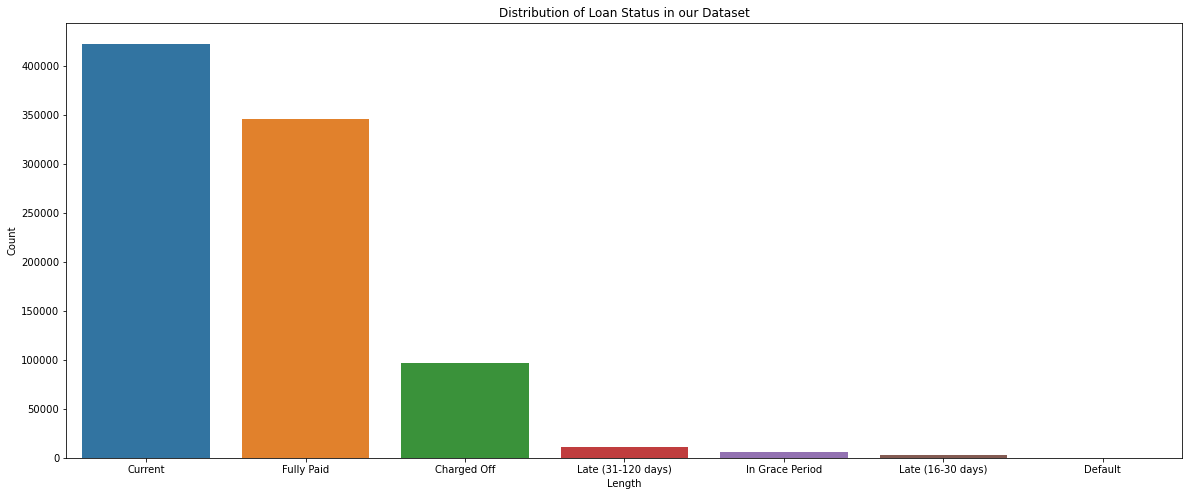

In [14]:
m =data['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Loan Status in our Dataset")
plt.show()

In [15]:
data['loan_status'].value_counts()

Current               422685
Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

In [16]:
data = data.loc[data['loan_status'].isin(['Fully Paid', 'Charged Off','Default','Late (31-120 days)', 'In Grace Period','Late (16-30 days)'])]

We create a binary variable "Fully Paid" = 1 and 0 for the rest.

In [17]:
data['Target'] = [1 if i=='Fully Paid' else 0 for i in data['loan_status']]
data['Target'].value_counts()

1    345520
0    116671
Name: Target, dtype: int64

After eliminating "Current" and "In Grace Period", we have now a new dataset of 456.684_ observations with a __152 variables in contrast with our previous one wiht 884.876 observations

#### Loan Amont

Data Dictionary: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

In [18]:
data['loan_amnt'].describe()

count    462191.000000
mean      14635.409171
std        8527.926001
min        1000.000000
25%        8000.000000
50%       12600.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

The range of the loan goes from 1.000 to 40.000 dollar, being the mean 14.635,40 dollars and the median 12.6000.

In [19]:
lamount = data.groupby('loan_status')['loan_amnt'].describe()


In [20]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,15474.184931,8452.244061,1000.0,9450.0,14300.0,20000.0,40000.0
Default,34.0,16982.352941,10139.744277,2000.0,7975.0,15950.0,25750.0,35000.0
Fully Paid,345520.0,14310.467918,8496.856492,1000.0,8000.0,12000.0,20000.0,40000.0
In Grace Period,5507.0,16686.190303,9018.346465,1000.0,10000.0,15000.0,23000.0,40000.0
Late (16-30 days),2915.0,16519.090909,9293.453581,1000.0,10000.0,15000.0,23000.0,40000.0
Late (31-120 days),11168.0,15889.765401,8856.010309,1000.0,9600.0,14875.0,21000.0,40000.0


<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

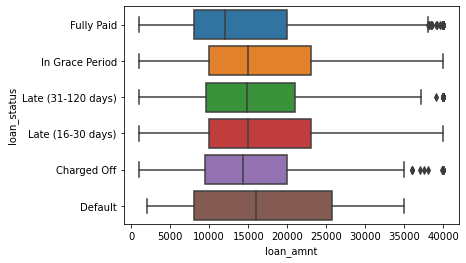

In [21]:
sns.boxplot(x=data['loan_amnt'], y=data['loan_status'], data=data) 

As we can see for all the categories the median has the same range of values, however we can see an important disperse in the loan amount, for example in default we observe it has de highest loan amount of any category whicho for us the bank is an important KPI. We are going to consider this variable very important in building our algorithim.

#### Installment

Data Dictionary: "The monthly payment owed by the borrower if the loan originates."

In [22]:
data['installment'].describe()

count    462191.000000
mean        441.383306
std         253.163070
min          14.010000
25%         258.100000
50%         380.630000
75%         581.450000
max        1719.830000
Name: installment, dtype: float64

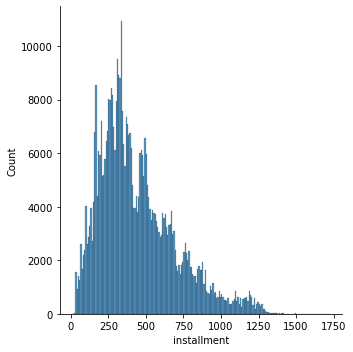

In [23]:
sns.displot(data['installment'])

As we can see form the plot, most of the installments are between 100 dollars and 700 dollars.

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

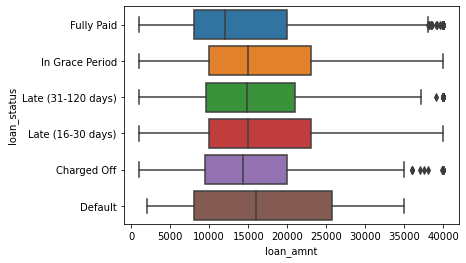

In [24]:
sns.boxplot(x=data['loan_amnt'], y=data['loan_status'], data=data) 

We cas see that Fully Paid has the lowest installments, so we can see there might be a relation between the installments and if the clients is paying or not.

In [25]:
data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,455.239356,245.169735,30.44,279.1600,398.160,587.340,1516.27
Default,34.0,499.614706,302.441619,65.99,276.2525,450.665,690.190,1145.69
Fully Paid,345520.0,435.616678,254.397489,14.01,250.2900,374.330,577.440,1714.54
In Grace Period,5507.0,489.030846,267.989101,32.16,293.1250,437.050,639.725,1544.87
Late (16-30 days),2915.0,485.521341,274.587466,33.36,285.0200,424.560,635.760,1719.83
Late (31-120 days),11168.0,464.194916,260.103711,31.33,277.1350,402.095,602.720,1566.80


As we can see from the statistics, loans that have Fully Paid have $30/50 lower installments.

As there might be a relationship between the installments and if a clients pays or not, we are going to keep this feature in our model.

### Emp_length

"Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years." The actual data does not match this description, obviously is more likely to give a loan to someone who has a estable job.


In [26]:
data['emp_length'].value_counts(dropna=False).sort_index()

1 year        30006
10+ years    152434
2 years       41335
3 years       36662
4 years       27057
5 years       26907
6 years       20919
7 years       22648
8 years       23176
9 years       18403
< 1 year      37558
NaN           25086
Name: emp_length, dtype: int64

Because of their character type, we are going to transform it into numbers

In [27]:
data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [28]:
data['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [29]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [30]:
data['emp_length'] = data['emp_length'].apply(emp_length_to_int)

In [31]:
data['emp_length'].value_counts(dropna=False).sort_index()

0.0      37558
1.0      30006
2.0      41335
3.0      36662
4.0      27057
5.0      26907
6.0      20919
7.0      22648
8.0      23176
9.0      18403
10.0    152434
NaN      25086
Name: emp_length, dtype: int64

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


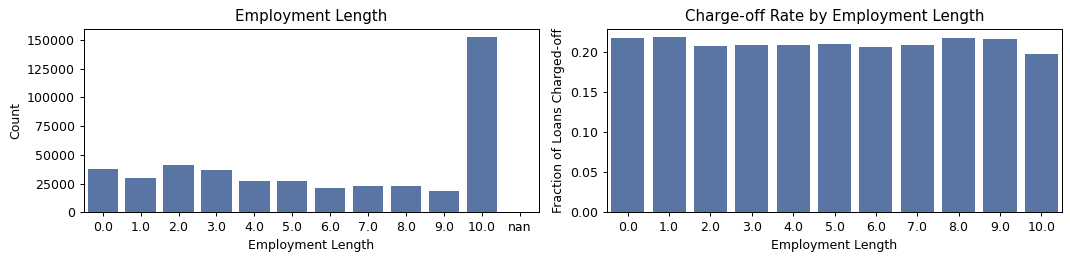

In [32]:
plot_var('emp_length', 'Employment Length', continuous=False)

It is more common for people who have 10 or more years in a job to ask for a loan.

In [33]:
data.groupby('loan_status')['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,90137.0,5.903014,3.693227,0.0,2.0,6.0,10.0,10.0
Default,33.0,5.060606,3.707588,0.0,2.0,5.0,9.0,10.0
Fully Paid,328556.0,6.041092,3.684129,0.0,3.0,6.0,10.0,10.0
In Grace Period,5262.0,5.791334,3.767348,0.0,2.0,6.0,10.0,10.0
Late (16-30 days),2697.0,5.850204,3.740343,0.0,2.0,6.0,10.0,10.0
Late (31-120 days),10420.0,5.903455,3.731908,0.0,2.0,6.0,10.0,10.0


#### Grade

Data Dictionary for grade: "LendingClub assigned loan grade." Grade is a variable that has a relation with other variables that we have deciede to drop, such as int_rate and subgrade.
Grade help us understant how risky a loan is

The values of grade are the following:

In [34]:
print(sorted(data['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


Being A the savest one and F the risky one.

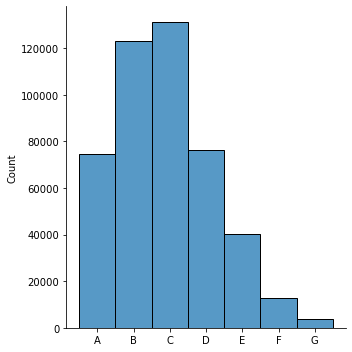

In [35]:
sns.displot(sorted(data['grade']))

We can see the mos dominant one is range C, followed by B. The bank has fewer risky loans than saved ones. However there is still an important number of loans with a risky grade.

In [36]:
data.groupby('loan_status')['grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,97047,7,C,29257
Default,34,6,C,12
Fully Paid,345520,7,B,102359
In Grace Period,5507,7,C,1826
Late (16-30 days),2915,7,C,957
Late (31-120 days),11168,7,C,3648


Most of the loan status have a grade C loan, which indicates that the risk is medium.

#### Home_ownership

Data Dictionary: "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [37]:
data['home_ownership'].value_counts()

MORTGAGE    229218
RENT        184824
OWN          48147
ANY              2
Name: home_ownership, dtype: int64

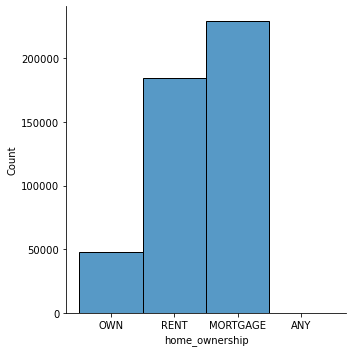

In [38]:
sns.displot(data['home_ownership'])

Most of the people who are asking for a loan are people how have a mortage or living rent.

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


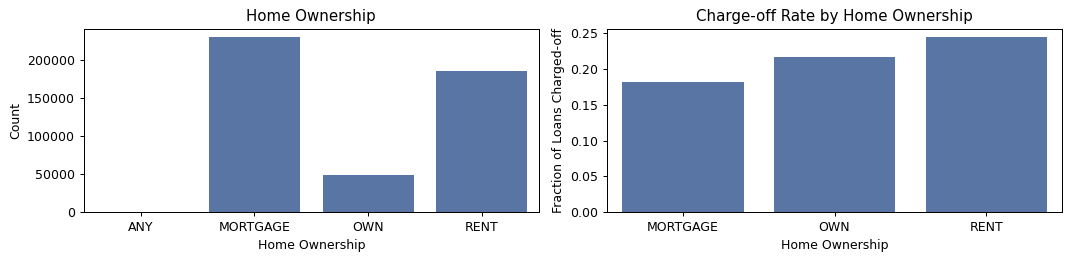

In [39]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appear to be large differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off. Let's compare the charge-off rates:

In [40]:
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,"Fully Paid"]

home_ownership
ANY         1.000000
MORTGAGE    0.780820
OWN         0.738177
RENT        0.708777
Name: loan_status, dtype: float64

In [41]:
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,"Charged Off"]

home_ownership
MORTGAGE    0.181098
OWN         0.216857
RENT        0.243989
Name: loan_status, dtype: float64

#### Annual Income

Data Dictionary: "The self-reported annual income provided by the borrower during registration." We consider is a very imporant variable for our project, because higher the income higher the chances of paying off their debt.

In [42]:
data['annual_inc'].describe()

count    4.621910e+05
mean     7.562226e+04
std      6.604570e+04
min      0.000000e+00
25%      4.570000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

We can see form the statisitcs, that people all around the economy(lower, middle and upper class) comes to Lending Club for a loan.

In [43]:
data.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,69117.236455,68387.196041,0.0,42640.0,60000.0,82000.0,8900060.0
Default,34.0,74572.352941,41125.057470,14400.0,45050.0,71000.0,92750.0,180000.0
Fully Paid,345520.0,77437.060290,63969.887245,0.0,47000.0,65000.0,93000.0,8253000.0
In Grace Period,5507.0,77098.767311,57442.125540,0.0,48000.0,65000.0,90000.0,2100000.0
Late (16-30 days),2915.0,77817.342556,54816.927690,1066.0,48000.0,65000.0,92000.0,900000.0
Late (31-120 days),11168.0,74704.577369,101941.925581,0.0,45000.0,63000.0,90000.0,9500000.0


From the statistics we can obtain the following information:

 - People who are in default not necessarily are the ones with the lowest income.
 - We can see there is not a primal variable as the mean is well distributed

### Verification Status

Data Dictionary: "Indicates if income was verified by Lending Club, not verified, or if the income source was verified."
This variables is very important for us, because as we have seen previously, the annual income is well distributed into the loan status, ande ther is people with high income that are defaulting, which is odd.

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


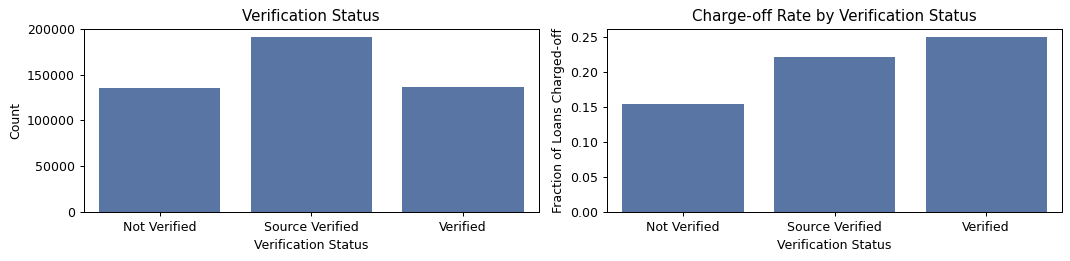

In [44]:
plot_var('verification_status', 'Verification Status', continuous=False)

Of the total of loans there are altmost 170.000 loans which has no income verified, which for the bank is an important issue that has to be corrected.
On the other hand of the people who didnt pay(Charged Off) 15% of them didnt had their income verify, which is a large percentage.

In [45]:
data.groupby('verification_status')['loan_status'].value_counts(normalize=True).loc[:,"Charged Off"]

verification_status
Not Verified       0.154712
Source Verified    0.221090
Verified           0.249412
Name: loan_status, dtype: float64

In [46]:
data.groupby('verification_status')['loan_status'].value_counts(normalize=True).loc[:,"Fully Paid"]

verification_status
Not Verified       0.814458
Source Verified    0.733379
Verified           0.700857
Name: loan_status, dtype: float64

### Dti

Data Dictionary: "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. This helps me understand if my client has more debts and what solvency does he have.

In [47]:
data['dti'].describe()

count    462170.000000
mean         18.448892
std           8.827327
min           0.000000
25%          12.110000
50%          17.920000
75%          24.370000
max         999.000000
Name: dti, dtype: float64

We have several strange indicators, such as min of 0 or max of 999, from this information we have concluded that we have outliers in our data. We are going to proceed taking into account dti less than 50, suggesting that the life of the loan ins 2 months.

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Debt-to-income Ratio')

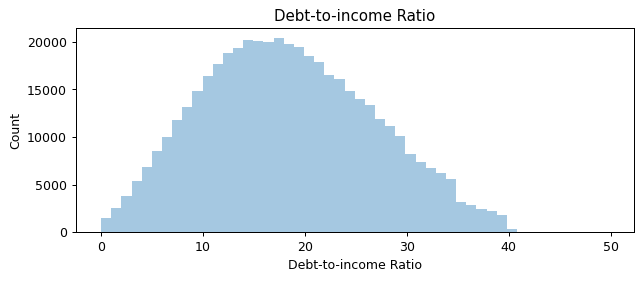

In [48]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(data.loc[data['dti'].notnull() & (data['dti']<50), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

The average debt to income rate is between 10% and 25%, seeing the loan amount previously it makes sense thar 10%-25% of the income of the clients are dedicated to paying off the debts.

What we found odd is the people who are paying more than 50%.

In [49]:
(data['dti']>=50).sum()

213

There are 213 clients dedicating more than 50% of their income to pay debts.

In [50]:
data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97045.0,20.461881,8.592399,0.00,14.0900,20.280,26.7800,126.38
Default,34.0,20.746176,8.168115,5.65,14.3325,19.545,28.6450,36.67
Fully Paid,345504.0,17.777278,8.673140,0.00,11.5900,17.200,23.4800,999.00
In Grace Period,5506.0,20.320588,11.111090,0.00,13.4700,19.750,26.3875,415.74
Late (16-30 days),2915.0,20.146806,9.766443,0.00,13.4350,19.650,26.0950,163.68
Late (31-120 days),11166.0,20.362004,10.710593,0.00,13.7400,19.900,26.6675,532.00


We can see that except Fully Paid the rest of the status has dti mean superior, altmos 3 points more.

### delinq_2yrs

According to the dictionary: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. I believe is an importante feauture, as it is already explaining that this client may have default in the last two years.

In [51]:
data['delinq_2yrs'].describe()

count    462191.000000
mean          0.342936
std           0.917497
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinq_2yrs, dtype: float64

In [52]:
data.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,0.368790,0.959922,0.0,0.0,0.0,0.0,27.0
Default,34.0,0.088235,0.378806,0.0,0.0,0.0,0.0,2.0
Fully Paid,345520.0,0.329671,0.894512,0.0,0.0,0.0,0.0,39.0
In Grace Period,5507.0,0.493009,1.098531,0.0,0.0,0.0,1.0,13.0
Late (16-30 days),2915.0,0.465866,1.090194,0.0,0.0,0.0,1.0,19.0
Late (31-120 days),11168.0,0.423352,1.066449,0.0,0.0,0.0,0.0,16.0


### fico_range_high & fico_range_low

Data Dictionary for fico_range_low: "The lower boundary range the borrower’s FICO at loan origination belongs to."

Data Dictionary for fico_range_high: "The upper boundary range the borrower’s FICO at loan origination belongs to."

Why FICO is important?

A FICO Score is a three-digit number based on the information in your credit reports. It helps lenders determine how likely you are to repay a loan. This, in turn, affects how much you can borrow, how many months you have to repay, and how much it will cost (the interest rate).

In [53]:
data[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,462191.000000,462191.000000
mean,692.877241,696.877334
std,30.150192,30.150663
min,660.000000,664.000000
25%,670.000000,674.000000
50%,685.000000,689.000000
75%,705.000000,709.000000
max,845.000000,850.000000


We have seen before the correlation between this variables, which is 1.

In [54]:
data[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


Both features are important for our model, so we cannot erase one and keep the other, so what we are going to do is create a variable that is the mean between the two variables and add it to our dataframe.

In [55]:
data['fico_score'] = 0.5*data['fico_range_low'] + 0.5*data['fico_range_high']

In [56]:
data.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


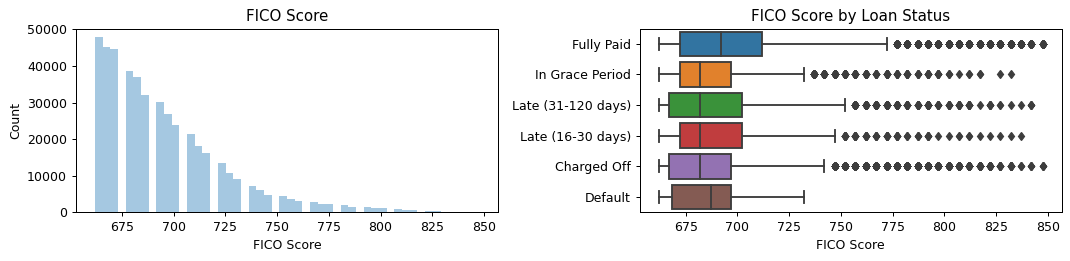

In [57]:
plot_var('fico_score', 'FICO Score', continuous=True)

There is a huge difference betweem FICO scores from Fully Paid and the rest, so it is a good variable to have in our midst.

### Pub_rec

Indicates the number of derogatory public records at the time of the loan, it indicates certain caractheristics of the clients so we decide it is best to mantain it

In [58]:
data['pub_rec'].value_counts().sort_index()

0     375467
1      72162
2       9753
3       2875
4        970
5        450
6        240
7        103
8         68
9         28
10        23
11        15
12        10
13         7
14         1
15         4
16         2
17         1
18         3
19         2
20         1
21         1
34         1
40         1
49         1
63         1
86         1
Name: pub_rec, dtype: int64

For almost al of our clients, they dont have any public records open, but is there any difference between Fully Paid loans and charged off loans?

In [59]:
data.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,0.258153,0.697692,0.0,0.0,0.0,0.0,86.0
Default,34.0,0.176471,0.575804,0.0,0.0,0.0,0.0,3.0
Fully Paid,345520.0,0.233069,0.612664,0.0,0.0,0.0,0.0,63.0
In Grace Period,5507.0,0.234429,0.672801,0.0,0.0,0.0,0.0,20.0
Late (16-30 days),2915.0,0.243911,0.722133,0.0,0.0,0.0,0.0,12.0
Late (31-120 days),11168.0,0.261730,0.626564,0.0,0.0,0.0,0.0,8.0


There are no significant differences between Fully Paid and the rest,

### Revol_bal

Stands for total credit revolving balance, is the portion of credit card spending that goes unpaid at the end of a billing cycle.

In [60]:
data['revol_bal'].describe()

count    4.621910e+05
mean     1.630418e+04
std      2.226781e+04
min      0.000000e+00
25%      5.992000e+03
50%      1.116000e+04
75%      1.987550e+04
max      2.560703e+06
Name: revol_bal, dtype: float64

Because of the high values, we have decided to transform it into log

In [61]:
data['log_revol_bal'] = data['revol_bal'].apply(lambda x: np.log10(x+1))

In [62]:
data.drop('revol_bal', axis=1, inplace=True)

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


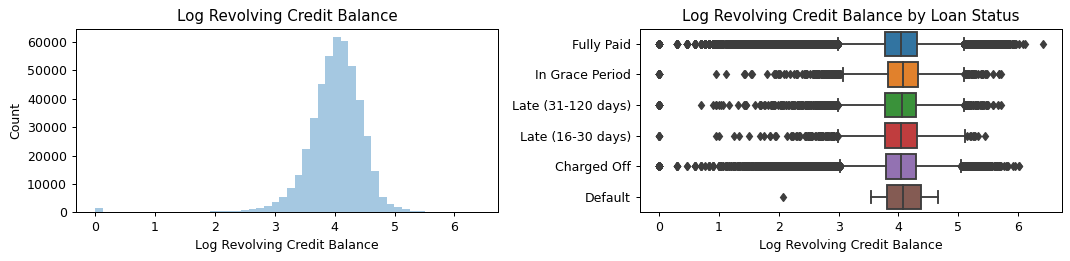

In [63]:
plot_var('log_revol_bal', 'Log Revolving Credit Balance', continuous=True)

From the grahps we obtain the following information, the revolving credit values goes in a range of 2.5 and 5.5 and the existance of a large number of outliers in every loan status.

Next we are going to see the stadistics of this variable, to see if there is any pattern.

In [64]:
data.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,4.004382,0.466612,0.000000,3.783689,4.047314,4.287298,6.016993
Default,34.0,4.046818,0.475969,2.064458,3.807066,4.074177,4.382388,4.666902
Fully Paid,345520.0,4.008127,0.494896,0.000000,3.775538,4.047314,4.301052,6.408359
In Grace Period,5507.0,4.036761,0.491383,0.000000,3.817036,4.079760,4.328594,5.712717
Late (16-30 days),2915.0,4.006478,0.491745,0.000000,3.782795,4.047041,4.315162,5.439723
Late (31-120 days),11168.0,3.998438,0.512480,0.000000,3.774535,4.050670,4.299011,5.705100


There isn't a large difference in the means.

### Total Acc

The total number of credit lines currently in the borrower's credit file, which obviously is an important feature at the time os asking another loan

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Number of Credit Lines')

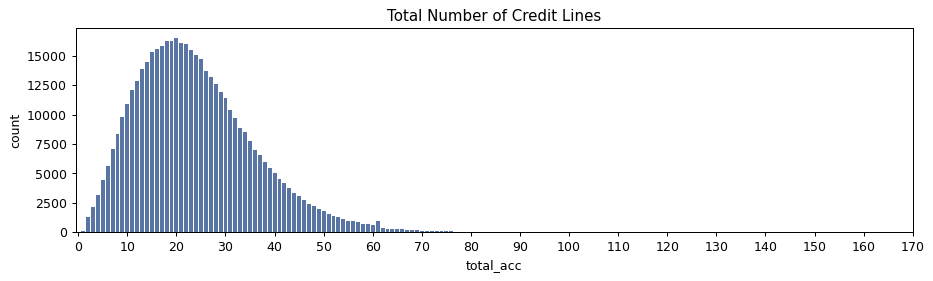

In [65]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(data['total_acc'], order=sorted(data['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

As we can see form the graph, most of our clients have other credit lines. 

In [66]:
data.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,25.752604,12.297424,2.0,17.00,24.0,33.0,169.0
Default,34.0,24.205882,11.245954,4.0,17.25,22.0,30.0,54.0
Fully Paid,345520.0,26.114983,12.117938,2.0,17.00,24.0,33.0,156.0
In Grace Period,5507.0,24.918104,12.152904,2.0,16.00,23.0,31.0,112.0
Late (16-30 days),2915.0,24.915266,11.901565,3.0,16.00,23.0,32.0,94.0
Late (31-120 days),11168.0,25.008954,12.170408,2.0,16.00,23.0,32.0,97.0


No difference here.

### Initial List Status

Indicates The initial listing status of the loan.

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


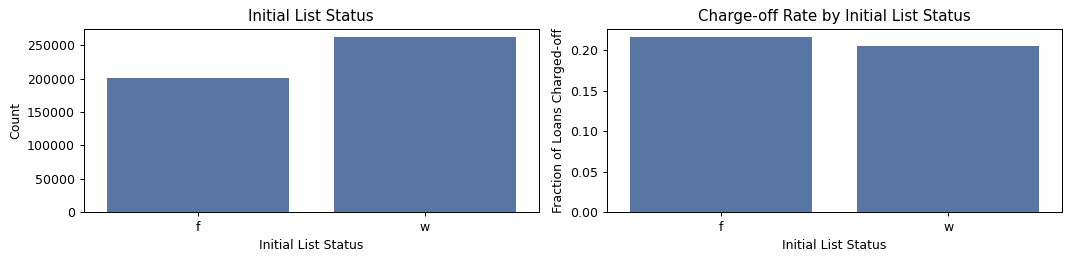

In [67]:
plot_var('initial_list_status', 'Initial List Status', continuous=False)

### Delinq_amnt

The past-due amount owed for the accounts on which the borrower is now delinquent, it is important to know if the new clients has delinquent accounts or not.

In [68]:
data['delinq_amnt'].describe()

count    462191.000000
mean         12.968292
std         715.303240
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       94521.000000
Name: delinq_amnt, dtype: float64

In [69]:
data.groupby('loan_status')['delinq_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,14.118602,728.772549,0.0,0.0,0.0,0.0,66497.0
Default,34.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Fully Paid,345520.0,12.530551,709.549956,0.0,0.0,0.0,0.0,94521.0
In Grace Period,5507.0,15.523697,734.348369,0.0,0.0,0.0,0.0,53193.0
Late (16-30 days),2915.0,3.240823,80.414534,0.0,0.0,0.0,0.0,3635.0
Late (31-120 days),11168.0,17.833811,846.258432,0.0,0.0,0.0,0.0,65000.0


We can observe that status: Charged Off, In Grace Period, Late(31-120) days have a difference of 3 points average in contras to Fully Paid.

### mort_acc

Stands for Number of mortgage accounts a client has


In [70]:
data['mort_acc'].describe()

count    462191.000000
mean          1.760372
std           2.080501
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          47.000000
Name: mort_acc, dtype: float64

According to our data, there is a client that has 47 mortgages accounts, that is amazing

In [71]:
data.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,1.460993,1.909494,0.0,0.0,1.0,2.0,29.0
Default,34.0,1.235294,1.826718,0.0,0.0,0.0,2.0,6.0
Fully Paid,345520.0,1.864896,2.129270,0.0,0.0,1.0,3.0,47.0
In Grace Period,5507.0,1.449610,1.838205,0.0,0.0,1.0,2.0,14.0
Late (16-30 days),2915.0,1.418525,1.810459,0.0,0.0,1.0,2.0,13.0
Late (31-120 days),11168.0,1.372135,1.818322,0.0,0.0,1.0,2.0,19.0


From our data, we can conclude that client that have paid their loans are more likely to have several martgage accounts.

###  pub_rec_bankruptcies

Number of public record bankruptcies, whcich is important to know before giving out a loan.

In [72]:
data['pub_rec_bankruptcies'].value_counts().sort_index()

0     399497
1      58566
2       3229
3        654
4        156
5         56
6         15
7         13
8          2
9          1
11         1
12         1
Name: pub_rec_bankruptcies, dtype: int64

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


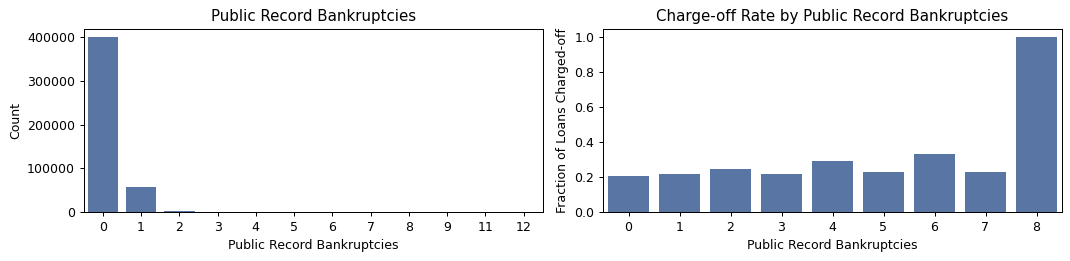

In [73]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

In [74]:
data.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,97047.0,0.157151,0.412267,0.0,0.0,0.0,0.0,8.0
Default,34.0,0.117647,0.327035,0.0,0.0,0.0,0.0,1.0
Fully Paid,345520.0,0.145178,0.392832,0.0,0.0,0.0,0.0,12.0
In Grace Period,5507.0,0.114037,0.354614,0.0,0.0,0.0,0.0,5.0
Late (16-30 days),2915.0,0.132075,0.416769,0.0,0.0,0.0,0.0,11.0
Late (31-120 days),11168.0,0.151236,0.406093,0.0,0.0,0.0,0.0,4.0


Una vez que finalizamos el análisis exploratorio de nuestro dataset, procedemos a tratar las variables categóricas y numéricas.

### Missing value final

In [75]:
miss_values = null_values(data)
miss_values.head()

El dataframe tiene 37 columnas.
Hay 4 columnas que tienen valores NA.


,Missing Values,% of Total Values
emp_length,25086,5.4
num_tl_120dpd_2m,19335,4.2
bc_util,5213,1.1
dti,21,0.0


In [76]:
data = data.dropna()

In [77]:
data.shape

(414340, 37)

### Variables Categoricas Final

Las variables categóricas final que nos quedan son:

In [78]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)

grade                   7
loan_status             6
home_ownership          4
verification_status     3
debt_settlement_flag    2
initial_list_status     2
dtype: int64

In [79]:
data_encoded = pd.get_dummies(data, columns=[
                            'grade',
                             'verification_status',
                             'home_ownership',
                             'debt_settlement_flag',
                             'initial_list_status'
                            ])
data_encoded.head()

,loan_amnt,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,pub_rec,total_acc,last_pymnt_amnt,...,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,debt_settlement_flag_N,debt_settlement_flag_Y,initial_list_status_f,initial_list_status_w
8,11575,359.26,6.0,153000.0,Fully Paid,16.99,0,1,46,11360.38,...,0,0,0,0,1,0,1,0,0,1
10,7200,285.70,2.0,50000.0,Fully Paid,6.07,0,0,5,7231.31,...,1,0,0,0,0,1,1,0,0,1
24,7500,232.79,7.0,110000.0,Fully Paid,13.12,0,0,27,7184.37,...,0,0,0,1,0,0,1,0,0,1
42,10000,243.29,7.0,51979.0,Fully Paid,10.11,0,2,21,10048.95,...,1,0,0,0,0,1,1,0,0,1
91,14000,492.34,7.0,75000.0,Fully Paid,10.86,1,0,10,13913.95,...,0,1,0,1,0,0,1,0,0,1


In [82]:
data_encoded.drop(["loan_status"], axis = 1, inplace = True)

In [83]:
data_encoded.to_csv('data_modelos.csv', index=False)